In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import trange, tqdm
tqdm.pandas()

In [2]:
markup_gpt = pd.read_csv('../data/working_dir/gpt/markup_preprocessed_with_metrics.csv')
markup_gpt_lite = pd.read_csv('../data/working_dir/gpt-lite/markup_preprocessed_with_metrics.csv')

print(markup_gpt.shape, markup_gpt_lite.shape)
markup_gpt

(99, 19) (99, 19)


,aspect,review,answers,gpt_markup,gpt_markup_preprocessed,concat_full_bertscore,concat_full_chrf,concat_full_rouge,concat_full_bleu,concat_precision_bert_score,concat_recall_bert_score,concat_f1_bert_score,concat_score_chrf,concat_rouge1,concat_rouge2,concat_rougeL,concat_rougeLsum,concat_bleu,concat_brevity_penalty_bleu
0,описание личности персонажей,"По-настоящему живой фильм, держит все свои 118...",{'затронуты как личностный аспект человека и е...,NaN,{'-'},"{'precision': [0.742644190788269], 'recall': [...","{'score': 2.5502988275012544, 'char_order': 6,...","{'rouge1': 0.0, 'rouge2': 0.0, 'rougeL': 0.0, ...","{'bleu': 0.0, 'precisions': [0.8, 0.5, 0.0, 0....",0.742644,0.530895,0.619166,2.550299,0.0,0.0,0.0,0.0,0.000000,2.491601e-05
1,описание игры актёров,Мстители стал первым экспериментом по сбор...,"{'Собственно сам сбор персонажей, и то какие м...","* Описание игры актёров, мнение об актёре или ...",{'-'},"{'precision': [0.6771140098571777], 'recall': ...","{'score': 0.6792878357130377, 'char_order': 6,...","{'rouge1': 0.0, 'rouge2': 0.0, 'rougeL': 0.0, ...","{'bleu': 0.0, 'precisions': [0.8, 0.5, 0.0, 0....",0.677114,0.393421,0.497678,0.679288,0.0,0.0,0.0,0.0,0.000000,2.115131e-19
2,описание декораций и графики,"Два взгляда столкнулись на море, Чтоб станц...",{'-'},NaN,{'-'},"{'precision': [1.0], 'recall': [1.0], 'f1': [1...","{'score': 100.0, 'char_order': 6, 'word_order'...","{'rouge1': 0.0, 'rouge2': 0.0, 'rougeL': 0.0, ...","{'bleu': 1.0, 'precisions': [1.0, 1.0, 1.0, 1....",1.000000,1.000000,1.000000,100.000000,0.0,0.0,0.0,0.0,1.000000,1.000000e+00
3,описание игры актёров,"Жена главного героя, собственно Джона Уика, уш...","{'Микаэл Нюквист , недавно ворвавшийся в Голл...",В каждом актёре угадывается свой неповторимый ...,"{'Киану Ривз, восставший из пепла, но не менее...","{'precision': [0.8908219933509827], 'recall': ...","{'score': 84.94295624736336, 'char_order': 6, ...","{'rouge1': 0.0, 'rouge2': 0.0, 'rougeL': 0.0, ...","{'bleu': 0.81485868555047, 'precisions': [0.88...",0.890822,0.890910,0.890866,84.942956,0.0,0.0,0.0,0.0,0.814859,1.000000e+00
4,описание игры актёров,'Мумия' - фантастическая комедийная история о ...,"{'Есть еще нимало незаурядных личностей, котор...","* В роли Эвелин выступила актриса Рейчел Вайс,...","{'В роли Эвелин выступила актриса Рейчел Вайс,...","{'precision': [0.7149181962013245], 'recall': ...","{'score': 23.73968001308012, 'char_order': 6, ...","{'rouge1': 0.0, 'rouge2': 0.0, 'rougeL': 0.0, ...","{'bleu': 0.09470423511543487, 'precisions': [0...",0.714918,0.747526,0.730858,23.739680,0.0,0.0,0.0,0.0,0.094704,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,характеристика внешности персонажей,Как много в кинематографе переоцененных фильмо...,{'-'},NaN,{'-'},"{'precision': [1.0], 'recall': [1.0], 'f1': [1...","{'score': 100.0, 'char_order': 6, 'word_order'...","{'rouge1': 0.0, 'rouge2': 0.0, 'rougeL': 0.0, ...","{'bleu': 1.0, 'precisions': [1.0, 1.0, 1.0, 1....",1.000000,1.000000,1.000000,100.000000,0.0,0.0,0.0,0.0,1.000000,1.000000e+00
95,описание эмоций от просмотра фильма,Как много в кинематографе переоцененных фильмо...,"{'Лично я не растрогалась, глядя на людей. Рас...",*None*,{'-'},"{'precision': [0.6965545415878296], 'recall': ...","{'score': 0.5579948578413637, 'char_order': 6,...","{'rouge1': 0.0, 'rouge2': 0.0, 'rougeL': 0.0, ...","{'bleu': 0.0, 'precisions': [0.8, 0.5, 0.0, 0....",0.696555,0.386841,0.497428,0.557995,0.0,0.0,0.0,0.0,0.000000,1.432552e-23
96,описание декораций и графики,Как много в кинематографе переоцененных фильмо...,{'-'},*None*,{'-'},"{'precision': [1.0], 'recall': [1.0], 'f1': [1...","{'score': 100.0, 'char_order': 6, 'word_order'...","{'rouge1': 0.0, 'rouge2': 0.0, 'rougeL': 0.0, ...","{'bleu': 1.0, 'precisions': [1.0, 1.0, 1.0, 1....",1.000000,1.000000,1.000000,100.000000,0.0,0.0,0.0,0.0,1.000000,1.000000e+00
97,философские рассуждения,Как много в кинематографе переоцененных фильмо...,{'-'},В рецензии в



MEAN:
YaGPT: 0.8062486221091916
YaGPT-lite: 0.794440073196334


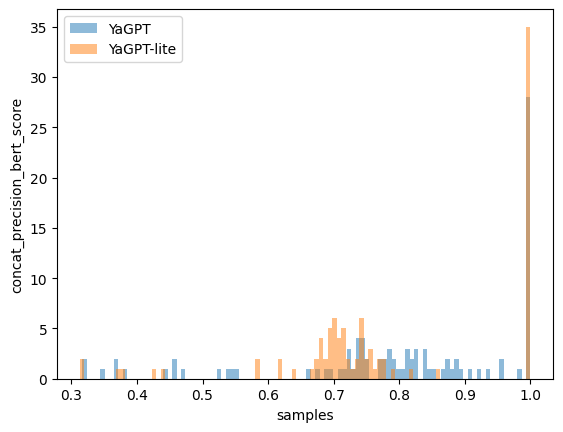



MEAN:
YaGPT: 0.8196023124637026
YaGPT-lite: 0.7027997494948031


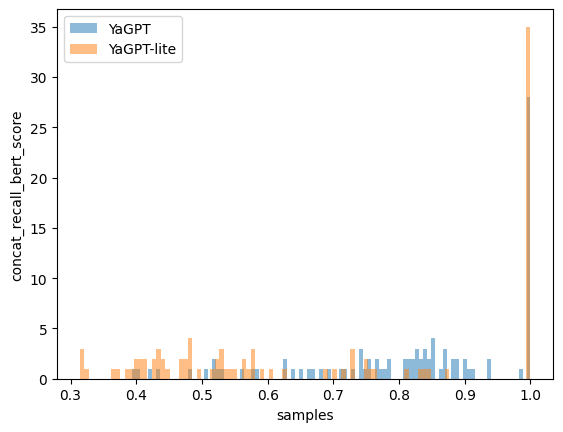



MEAN:
YaGPT: 0.8052138499539307
YaGPT-lite: 0.7332179739017679


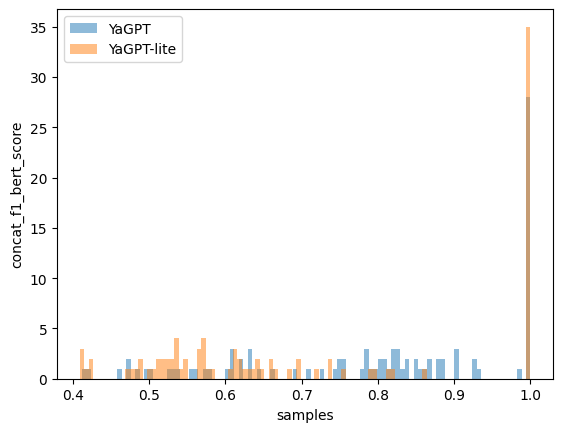



MEAN:
YaGPT: 50.25567377387134
YaGPT-lite: 39.92129209482398


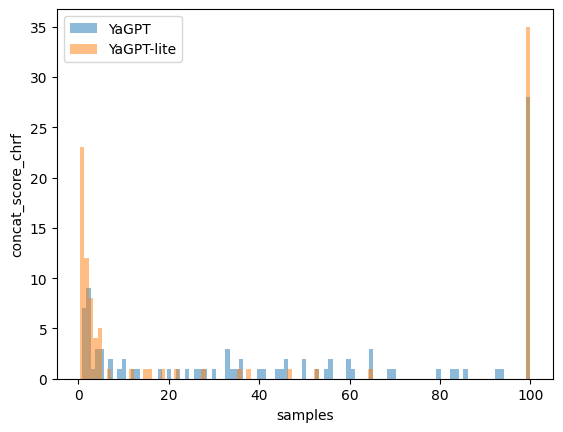



MEAN:
YaGPT: 0.020202020202020204
YaGPT-lite: 0.010101010101010102


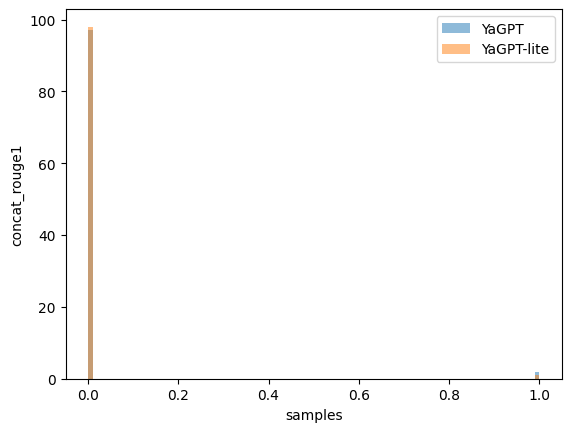



MEAN:
YaGPT: 0.010101010101010102
YaGPT-lite: 0.010101010101010102


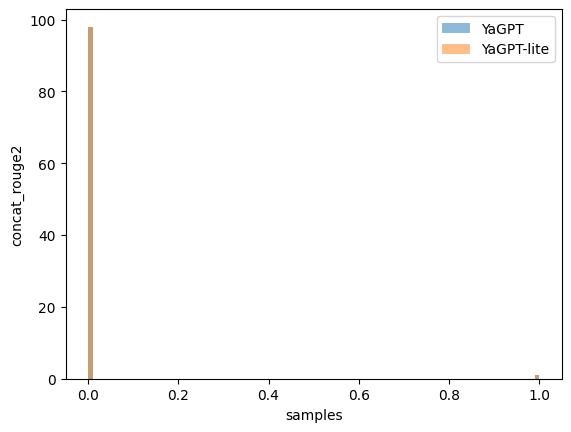



MEAN:
YaGPT: 0.020202020202020204
YaGPT-lite: 0.010101010101010102


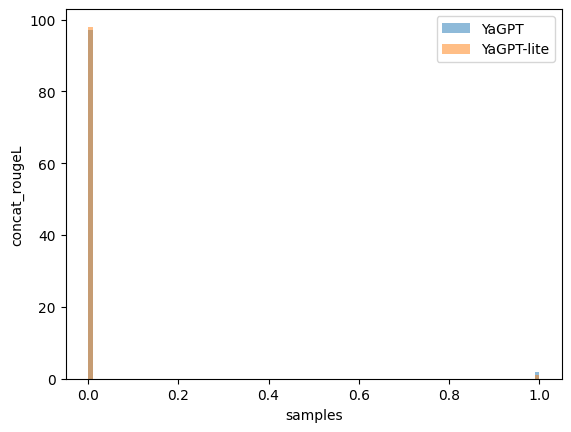



MEAN:
YaGPT: 0.020202020202020204
YaGPT-lite: 0.010101010101010102


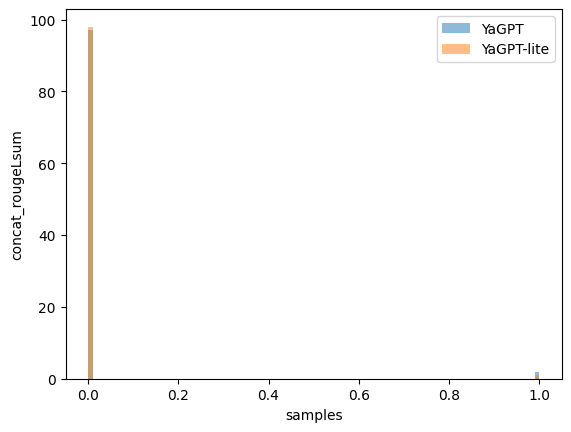



MEAN:
YaGPT: 0.43482517637677687
YaGPT-lite: 0.36986939991516166


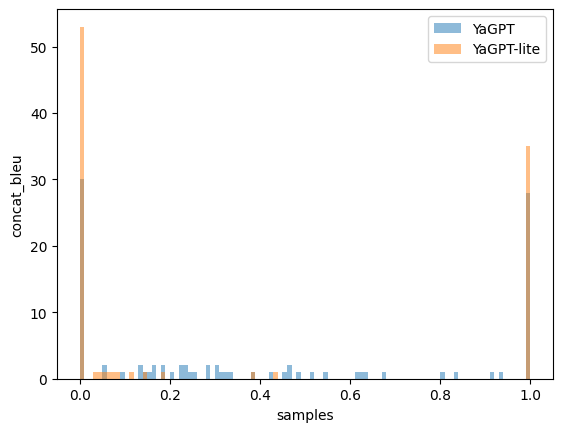



MEAN:
YaGPT: 0.8088547014704571
YaGPT-lite: 0.5261325950565069


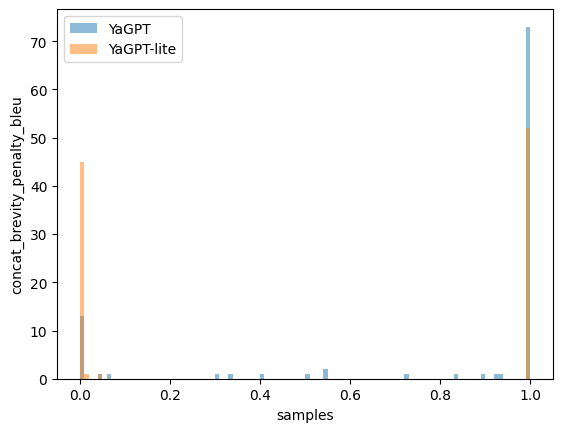

<BarContainer object of 10 artists>

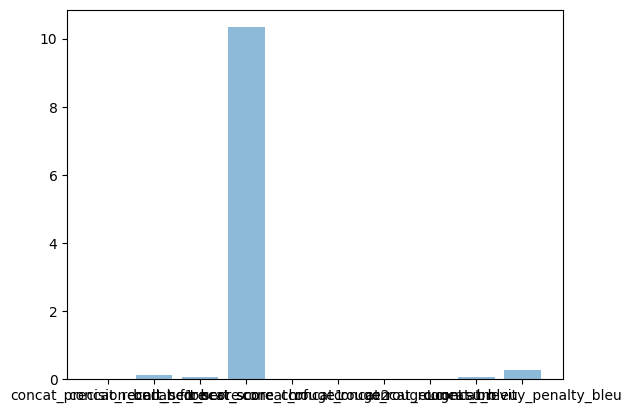

In [27]:
gpt_means = []
gpt_lite_means = []

for col in markup_gpt.columns[-10:]:
    gpt_mean = markup_gpt[col].mean()
    gpt_lite_mean = markup_gpt_lite[col].mean()

    gpt_means.append(gpt_mean)
    gpt_lite_means.append(gpt_lite_mean)
    
    print('\n\nMEAN:')
    print(f'YaGPT: {gpt_mean}')
    print(f'YaGPT-lite: {gpt_lite_mean}')
    plt.hist(markup_gpt[col], bins=100, label='YaGPT', alpha=0.5)
    plt.hist(markup_gpt_lite[col], bins=100, label='YaGPT-lite', alpha=0.5)
    plt.xlabel('samples')
    plt.ylabel(col)
    plt.legend()
    plt.show()

# plt.bar(markup_gpt.columns[-10:], gpt_means, label='YaGPT', alpha=0.5)
# plt.bar(markup_gpt.columns[-10:], gpt_lite_means, label='YaGPT-lite', alpha=0.5)
plt.bar(markup_gpt.columns[-10:], pd.Series(gpt_means) - pd.Series(gpt_lite_means), label='YaGPT - YaGPT-lite', alpha=0.5)